<Figure size 600x400 with 0 Axes>

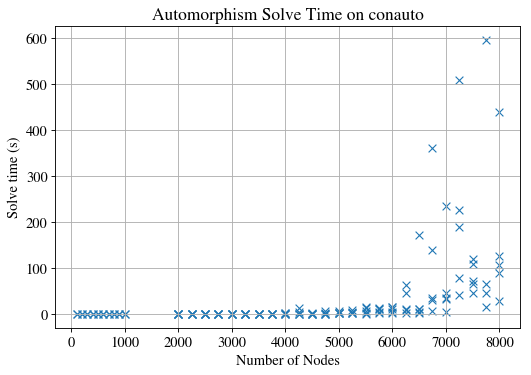

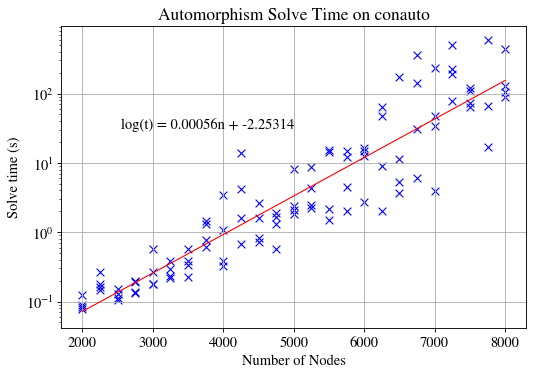

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['lines.markersize'] = 7
matplotlib.rcParams['lines.linewidth'] = 1
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['axes.grid'] = 'true'

def clean_time(s):
    s = s.replace("seconds: ", "")
    s = s.strip()
    return float(s)

def clean_size(s):
    return int(s[-5:])

def clean_label(s):
    return s[:-1]

INF = 5 * 3600
plt.figure(num=None, figsize=(7.5, 5))

labels = []
sizes = []
conauto_times = []

f = open("data/conauto_summary.txt", "r")
l = f.readlines()

for i in range(len(l)):
    if not(l[i].startswith("seconds: ")):
        labels.append(clean_label(l[i]))
        sizes.append(clean_size(l[i]))
        conauto_times.append(INF)
    else:
        conauto_times[-1] = clean_time(l[i])

fig = plt.figure(num=None, figsize=(7.5, 5))
ax = fig.add_subplot(111)

ax.scatter(sizes, conauto_times, marker='x')
    
ax.set_title("Automorphism Solve Time on conauto")
ax.set_ylabel("Solve time (s)")
ax.set_xlabel("Number of Nodes")
plt.show()

fig.savefig("exports/conauto_times.pdf", bbox_inches='tight')

eps = 1e-10

log_conauto_times = np.log10(np.array(conauto_times) + eps)

fig = plt.figure(num=None, figsize=(7.5, 5))
ax = fig.add_subplot(111)

# find linear best fit to log graph
fit_coeff = np.polyfit(sizes[45:], log_conauto_times[45:], 1)
fit_line = 10 ** (np.array(sizes[45:]) * fit_coeff[0] + fit_coeff[1])
ax.scatter(sizes[45:], conauto_times[45:], c="b", marker="x")

ax.plot([sizes[45], sizes[-1]], [fit_line[0], fit_line[-1]], c='r')
ax.set_title("Automorphism Solve Time on conauto")
ax.set_yscale("log")
ax.set_ylabel("Solve time (s)")
ax.set_xlabel("Number of Nodes")
ax.text(0.5, 0.65, "log(t) = %.5fn + %.5f" % (fit_coeff[0], fit_coeff[1]),
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes, fontsize=13)
plt.show()

fig.savefig("exports/conauto_log_times.pdf", bbox_inches='tight')